In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../dataset/StudentExamScores.csv")

In [15]:
df.head()

,StudyHours,PrevScore,Attendence,FinalScore
0,27,83,90,87
1,47,92,93,90
2,13,86,70,94
3,3,79,83,86
4,10,72,83,76


In [16]:
df.tail()

,StudyHours,PrevScore,Attendence,FinalScore
1995,30,79,93,82
1996,20,74,93,73
1997,14,81,83,78
1998,5,88,67,75
1999,27,87,83,100


In [18]:
df.describe()

,StudyHours,PrevScore,Attendence,FinalScore
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,17.755500,80.503500,87.809500,80.888000
std,12.129604,6.747129,8.753315,11.637705
min,0.000000,55.000000,67.000000,60.000000
25%,5.000000,76.000000,83.000000,71.000000
50%,18.000000,80.000000,90.000000,81.000000
75%,28.000000,85.000000,93.000000,91.000000
max,50.000000,98.000000,100.000000,100.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   StudyHours  2000 non-null   int64
 1   PrevScore   2000 non-null   int64
 2   Attendence  2000 non-null   int64
 3   FinalScore  2000 non-null   int64
dtypes: int64(4)
memory usage: 62.6 KB


In [ ]:
# 1. Removing duplicates from dataset
duplicates = df[df.duplicated()]
duplicates

,StudyHours,PrevScore,Attendence,FinalScore
1057,32,81,97,75
1303,27,87,83,87
1429,35,94,97,99
1562,3,79,83,86
1675,31,79,90,100
1678,5,85,90,80
1754,35,93,90,92
1787,34,83,93,94
1799,25,78,83,68
1918,35,93,90,90


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df[df.duplicated()]

,StudyHours,PrevScore,Attendence,FinalScore


In [23]:
# 2. Handling missing values
df.isnull().sum()

StudyHours    0
PrevScore     0
Attendence    0
FinalScore    0
dtype: int64

In [24]:
# 3. Deleting unnecessary rows and columns 

columns = []
df = df.drop(columns=columns, axis=1)
# No unnecessary columns are present

In [25]:
column = ["StudyHours", "PrevScore", "Attendence"]

for col in column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

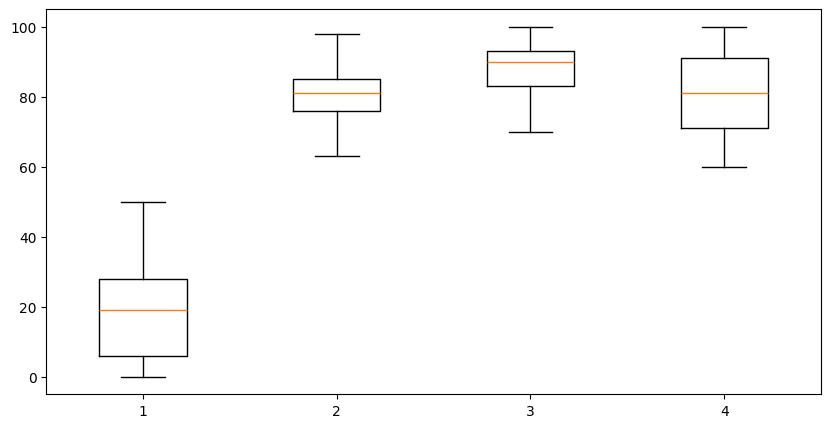

In [28]:
plt.figure(figsize=(10,5))
plt.boxplot(df)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
a = df[["StudyHours", "PrevScore", "Attendence"]]

In [33]:
b = df['FinalScore']

In [34]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.25, random_state=45)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [37]:
model.fit(xtrain, ytrain)

LinearRegression()

In [39]:
ypred = model.predict(xtest)

In [40]:
xtest.shape, ytest.shape

((473, 3), (473,))

Text(0, 0.5, 'Test Predicted Data')

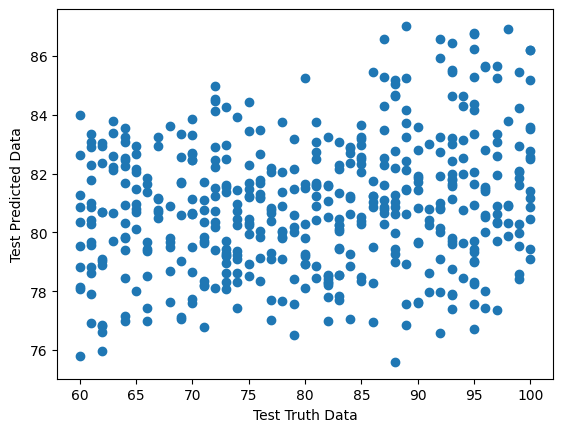

In [42]:
plt.scatter(ytest, ypred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [45]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 3.1 MB/s eta 0:00:49
   ---------------------------------------- 1.3/150.0 MB 3.1 MB/s eta 0:00:49
    --------------------------------------- 2.1/150.0 MB 3.2 MB/s eta 0:00:47
    --------------------------------------- 2.9/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 3.9/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 4.5/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 5.5/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 6.6/150.0 MB 3.8 MB/s eta 0:00:38
   - -------------------------------------- 7.3/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.1/150.0 MB 3.8 MB/s eta 0:00:38
   -- ------------------------------------- 8.7/150.0 MB 3.7 MB/s eta 0:00:39


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [53]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.02959830866807611


In [48]:
model = SVC()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.021141649048625793


In [49]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.021141649048625793


In [50]:
model = GaussianNB()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.02748414376321353


In [52]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.016913319238900635
